## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Problem

It is up to you to define a stakeholder and business problem appropriate to this dataset.

If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes.

__A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.__

In [1]:
# Look at data before committing to a business problem than the one recommended

## Data

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder. As with most real world data sets, the column names are not perfectly described, so you'll have to do some research or use your best judgment if you have questions about what the data means.

It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you ignore some or all of the following features:

- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [8]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skewnorm

In [9]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Missing data seen in following:
- 'waterfront': (19221)
- 'view': (21534)
- 'yr_renovated': (17755)

'yr_renovated' and 'waterfront' columns appears to be the columns with the most data missing, and a few missing in 'view'

Too many columns. Let's specify what columns we need for our analysis

Removing the following:

- view
- sqft_above
- sqft_basement
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [11]:
data.drop(columns=['view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'], inplace=True)

In [12]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


Lets do a basic plot to see trends to the sale price of the home to the multiple variables

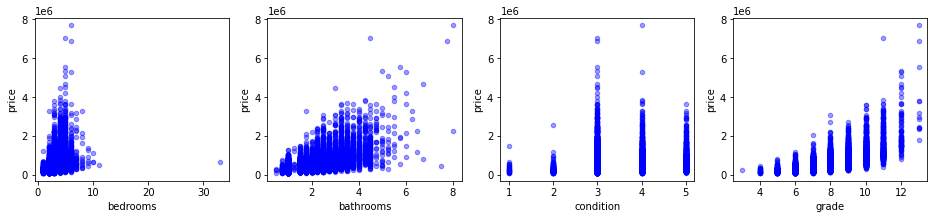

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms','bathrooms','condition','grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

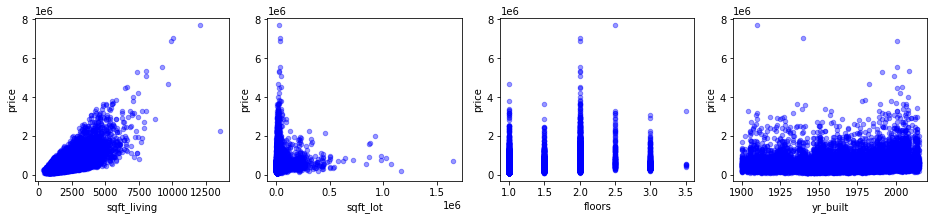

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living','sqft_lot','floors','yr_built'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

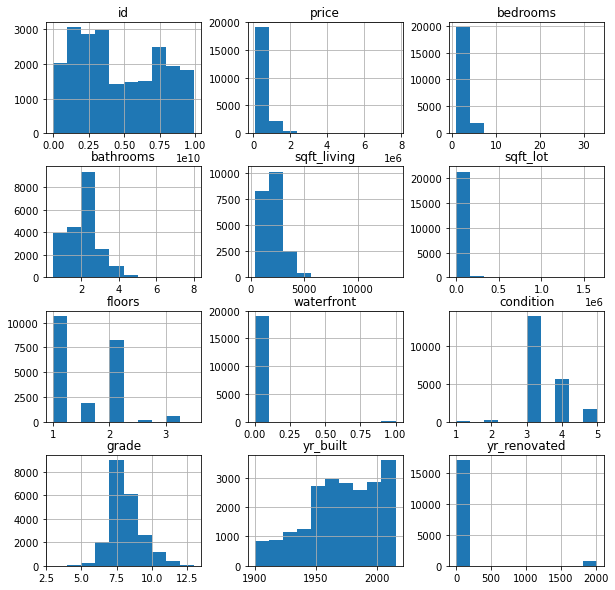

In [24]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax = ax);

Check for multicollinearity of features

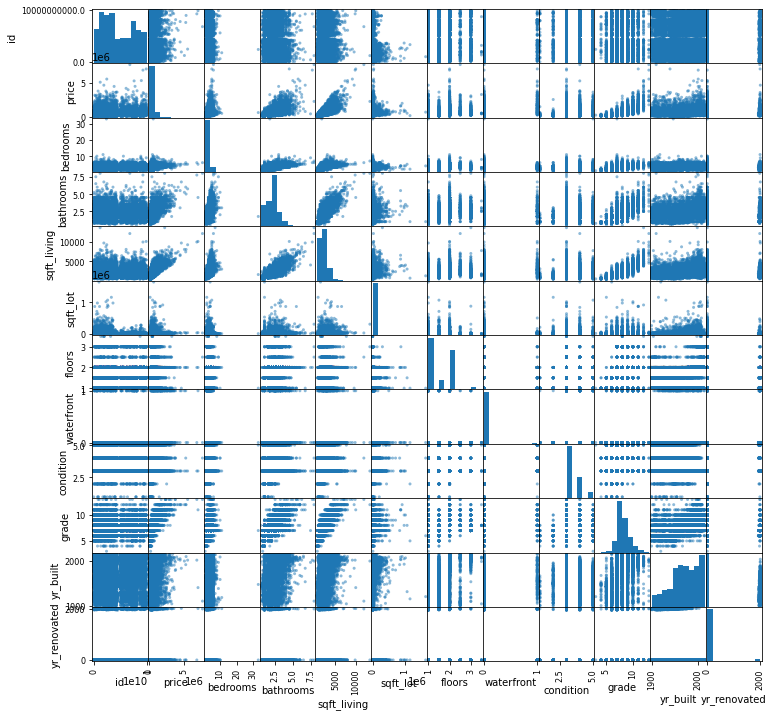

In [25]:
pd.plotting.scatter_matrix(data, figsize=[12,12]);
plt.show()

No multicollinearity is clearly seen between the variables at a glance. Let's code to check.

In [26]:
data.corr()
abs(data.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
id,True,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,False,False


In [27]:
df = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(bathrooms, sqft_living)",0.755758


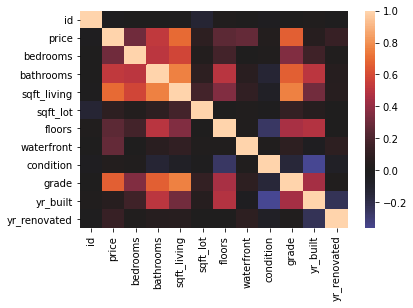

In [29]:
import seaborn as sns
sns.heatmap(data.corr(), center=0);

The pairs do not display extreme correlation values. Let's ignore the multicollinearity between the given variables. I do not think it will affect our regression outcome

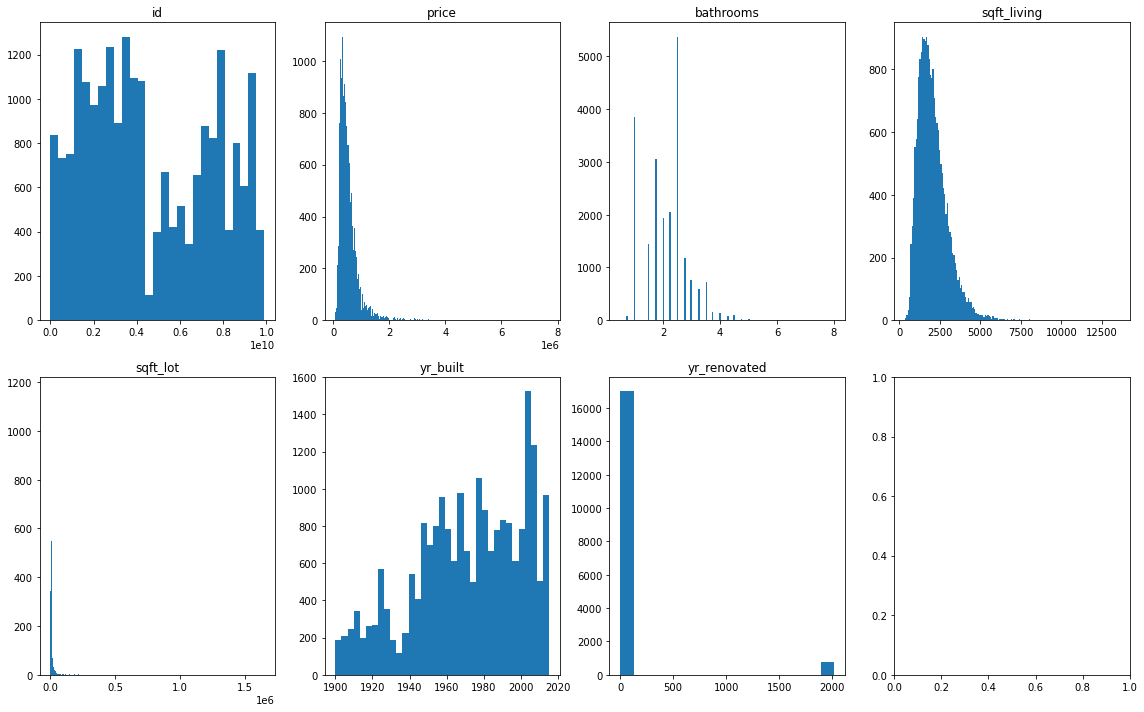

In [39]:
cat_data = data.loc[:, ((data.dtypes != 'object') & (data.nunique() >20))]

fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=4, figsize=(16,10))

categoricals = [column for column in cat_data.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(data[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [43]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'yr_built']
data_cont = data[continuous]

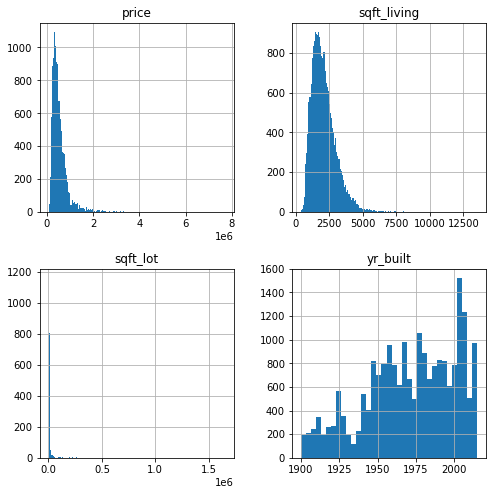

In [44]:
data_cont.hist(figsize  = [8, 8], bins='auto');

Perform log transformations for the variables where it makes sense

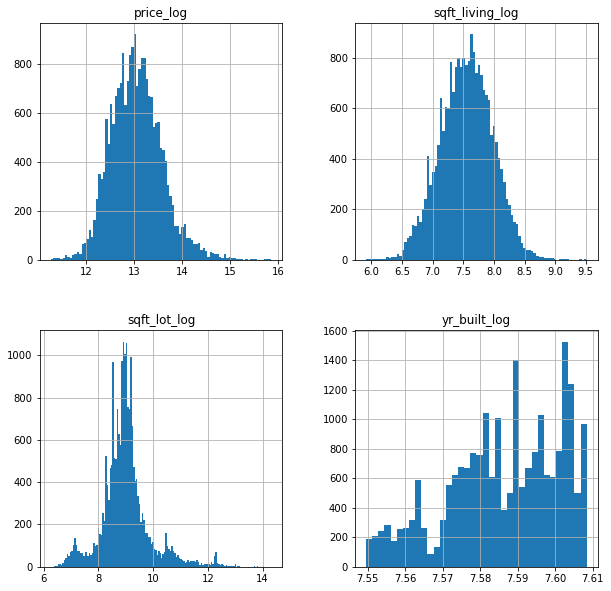

In [45]:
log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names
data_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

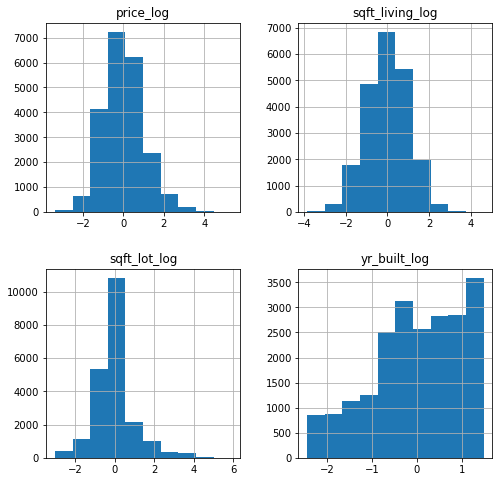

In [38]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

Categorical Features

In [49]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built',
       'yr_renovated'],
      dtype='object')

In [50]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'yr_built','yr_renovated']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

In [62]:
# Log transform and normalize
data_cont = data[continuous]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

In [80]:
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)
data_ohe

,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'yr_built', 'bathrooms']
categoricals = ['bedrooms', 'floors', 'condition', 'grade']

In [79]:
data['bedrooms'] = data['bedrooms'].apply(str)
data['floors'] = data['floors'].apply(str)
data['condition'] = data['condition'].apply(str)
data['grade'] = data['grade'].apply(str)

In [82]:
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
preprocessed.head()

,price_log,sqft_living_log,sqft_lot_log,yr_built_log,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,-1.401998,-1.125556,-0.388430,-0.537409,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.279938,0.709446,-0.113241,-0.674325,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.799430,-2.131893,0.244475,-1.293945,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.499698,0.070674,-0.523914,-0.196338,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.178434,-0.292725,0.008139,0.547946,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Run a linear model with SalePrice as the target variable in statsmodels

In [83]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [84]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1167.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:43:09   Log-Likelihood:                -19580.
No. Observations:               21597   AIC:                         3.923e+04
Df Residuals:                   21563   BIC:                         3.950e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1318      0.122      9.300      0.000       0.893       1.370
sqft_living_log     0.4524      0.008     55.938      0.000       0.437       0.468
sqft_lot_log       -0.0726      0.005    -14.828      0.000      -0.082      -0.063
yr_built_log       -0.3041      0.006    -52.029      0.000      -0.316      -0.293
bedrooms_10        -0.1634      0.350     -0.467      0.640      -0.849       0.522
bedrooms_11        -0.8917      0.602     -1.482      0.138      -2.071       0.288
bedrooms_2         -0.1221      0.046     -2.678      0.007      -0.211      -0.033
bedrooms_3         -0.3486      0.046     -7.610      0.000      -0.438      -0.259
bedrooms_33         0.3572      0.602      0.594      0.553      -0.822       1.536
bedrooms_4         -0.4159      0.047     -8.840      0.000      -0.508      -0.324
bedrooms_5         -0.3743      0.050     -7.546      0.000      -0.472      -0.277
bedrooms_6         -0.4456      0.060     -7.417      0.000      -0.563      -0.328
bedrooms_7         -0.5268      0.109     -4.843      0.000      -0.740      -0.314
bedrooms_8         -0.2522      0.174     -1.447      0.148      -0.594       0.089
bedrooms_9         -0.4928      0.250     -1.968      0.049      -0.984      -0.002
floors_1.5          0.0464      0.016      2.914      0.004       0.015       0.078
floors_2.0          0.0574      0.012      4.849      0.000       0.034       0.081
floors_2.5          0.1020      0.049      2.091      0.037       0.006       0.198
floors_3.0          0.4054      0.028     14.243      0.000       0.350       0.461
floors_3.5          0.2868      0.229      1.255      0.209      -0.161       0.735
condition_2        -0.0561      0.121     -0.464      0.642      -0.293       0.181
condition_3         0.2220      0.112      1.975      0.048       0.002       0.442
condition_4         0.2673      0.112      2.377      0.017       0.047       0.488
condition_5         0.4025      0.113      3.559      0.000       0.181       0.624
grade_11            0.4418      0.035     12.582      0.000       0.373       0.511
grade_12            0.9732      0.067     14.631      0.000       0.843       1.104
grade_13            1.4636      0.168      8.705      0.000       1.134       1.793
grade_3            -1.7297      0.602     -2.872      0.004      -2.910      -0.549
grade_4            -2.1308      0.121    -17.591      0.000      -2.368      -1.893
grade_5            -2.1414      0.048    -44.465      0.000      -2.236      -2.047
grade_6            -1.8437      0.029    -63.667      0.000      -1.900      -1.787
grade_7            -1.3808      0.023    -60.052      0.000      -1.426      -1.336
grade_8            -0.9307      0.021    -44.136      0.000      -0.972      -0.889
grade_9            -0.4268      0.022    -19.734      0.000

### Run the same model in scikit-learn

In [85]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [86]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [87]:
# coefficients
linreg.coef_

array([ 0.45240862, -0.07261187, -0.30414727, -0.16340557, -0.89170744,
       -0.1221068 , -0.34860645,  0.35716098, -0.4159154 , -0.3743177 ,
       -0.44564487, -0.52677182, -0.25224787, -0.49275997,  0.04639454,
        0.05742172,  0.1019523 ,  0.40542302,  0.28682675, -0.05611535,
        0.22203932,  0.26732933,  0.40254531,  0.44178309,  0.97319995,
        1.46357193, -1.72970607, -2.13079619, -2.14138283, -1.8437332 ,
       -1.38083693, -0.93066878, -0.4267665 ])

In [88]:
# intercept
linreg.intercept_

1.1318065430025026